In [15]:
import json
import requests
import matplotlib.pyplot as plt
from PIL import Image
import os
from evaluate import load


import importlib
import models
importlib.reload(models)
from models import Captioning_Model
  
bleu = load("bleu")

root = './UCM_captions/'
json_file = 'dataset.json'
img_folder = os.path.join(root, 'imgs/')
extension = '.tif'
with open(os.path.join(root,json_file)) as json_data:
    data = json.load(json_data)

In [10]:
model_blip = Captioning_Model('blip')
model_vit = Captioning_Model('vit')
model_git = Captioning_Model('git')

In [11]:
def get_max_bleu(bleu, prediction, references, max_order = 4):
    bleu_scores = [bleu.compute(max_order = max_order, predictions=prediction, references=[r]) for r in references]
    return bleu_scores, max([score['bleu']  for score in bleu_scores])    

./UCM_captions/imgs/1.tif
['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']


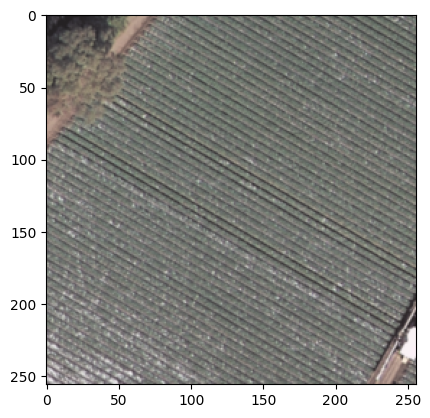

Predicting...
blip prediction(s): ['aerial view of a farm with a tractor and a tractor trailer']
Predicting...
vit prediction(s): ['a broken down street light on the side of a road']
Predicting...
git prediction(s): ['aerial view of a field with trees in the background']
./UCM_captions/imgs/2.tif
['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']


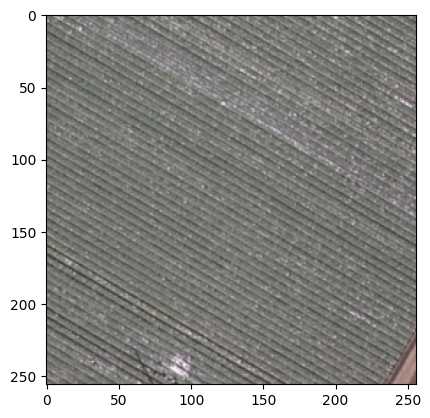

Predicting...
blip prediction(s): ['there is a bird that is standing on a roof']
Predicting...
vit prediction(s): ['a broken window in the middle of a snow covered field']
Predicting...
git prediction(s): ['a man walks down a path in a field of water.']
./UCM_captions/imgs/3.tif
['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']


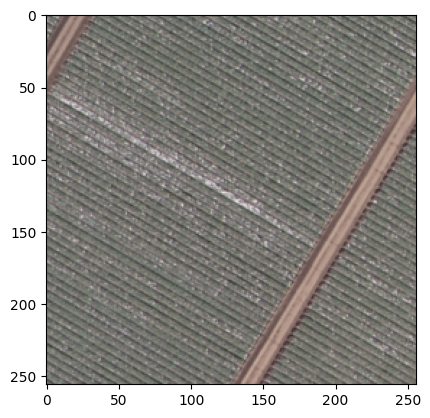

Predicting...
blip prediction(s): ['arafed aerial view of a field with a plane flying over it']
Predicting...
vit prediction(s): ['a pair of black and white photos of a street']
Predicting...
git prediction(s): ['an aerial view of a field with a water hose in the middle of it.']
./UCM_captions/imgs/4.tif
['There is a piece of farmland .', 'There is a piece of cropland .', 'It is a piece of farmland .', 'It is a piece of cropland .', 'Here is a piece of farmland .']


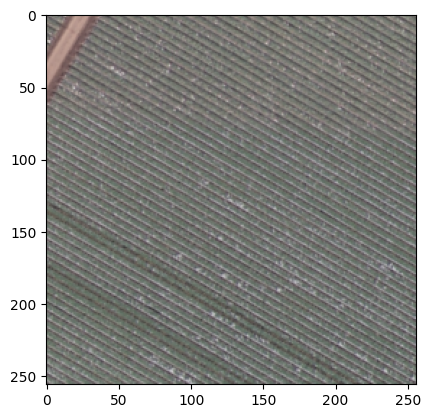

Predicting...
blip prediction(s): ['araffe flying over a field with a single plane in the sky']
Predicting...
vit prediction(s): ['a black and white photo of an empty street']
Predicting...
git prediction(s): ['aerial view of a field with a field of grapes']
CPU times: total: 2min 7s
Wall time: 41.3 s


In [12]:
%%time
import numpy as np
for i, img in enumerate(data['images']):
    img_id = img['imgid'] + 1 # IDs start at 0 but image indices start at 1
    img_path = img_folder + str(img_id) + extension
    print(img_path)
    raw_img = Image.open(img_path).convert('RGB')
#     print(np.array(raw_img).shape)
    references = [sent['raw'] for sent in img['sentences']]
    print(references)
    plt.imshow(raw_img)
    plt.show()

    prediction_blip = model_blip.predict(raw_img, log = True)
    prediction_vit = model_vit.predict(raw_img, log = True)
    prediction_git = model_git.predict(raw_img, log = True)
    
    n = 4
#     bleu_scores, max_bleu = get_max_bleu(bleu, [prediction_blip], references, max_order = n)
#     print('BLIP BLEU' + str(n), max_bleu)
    if i > 2:
        break

D:\Downloads\RSICD\\00001.jpg
(224, 224, 3)


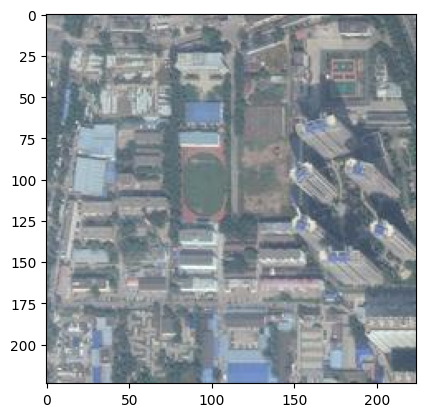

BLIP prediction: an aerial view of a baseball field and a baseball field
VIT-GPT2 prediction: ['a city with a lot of tall buildings']
D:\Downloads\RSICD\\00002.jpg
(224, 224, 3)


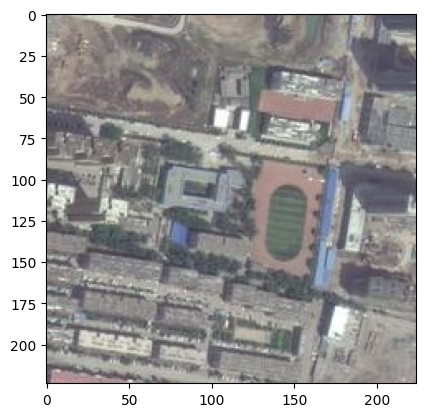

BLIP prediction: an aerial view of a soccer field and a soccer field
VIT-GPT2 prediction: ['a large building with a lot of windows']
D:\Downloads\RSICD\\00003.jpg
(224, 224, 3)


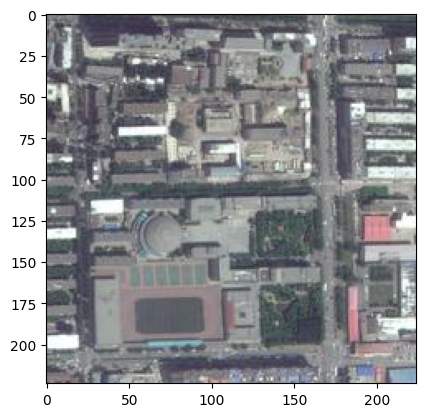

BLIP prediction: an aerial view of a city with a tennis court and a tennis court
VIT-GPT2 prediction: ['a city with a lot of traffic on a cloudy day']
D:\Downloads\RSICD\\00004.jpg
(224, 224, 3)


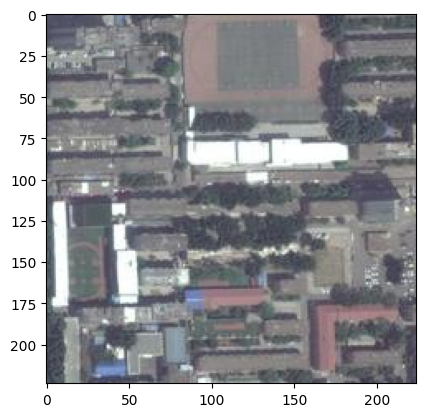

BLIP prediction: an aerial view of a soccer field and a soccer field
VIT-GPT2 prediction: ['a city street filled with lots of tall buildings']
D:\Downloads\RSICD\\00005.jpg
(224, 224, 3)


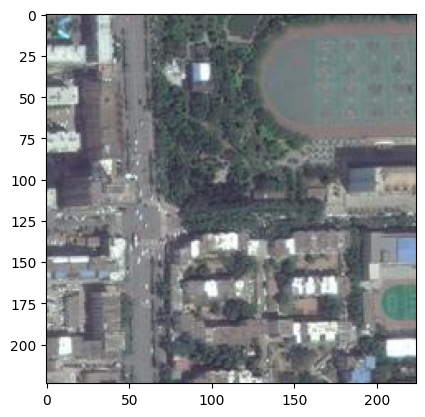

BLIP prediction: arafed aerial view of a city with a soccer field
VIT-GPT2 prediction: ['a large city with a lot of buildings']
D:\Downloads\RSICD\\00006.jpg
(224, 224, 3)


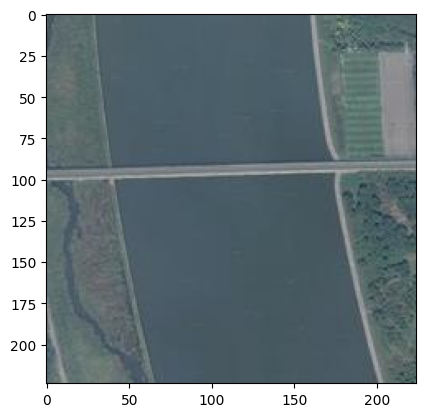

BLIP prediction: arafed aerial view of a road and a river
VIT-GPT2 prediction: ['an aerial view of a city skyline']
D:\Downloads\RSICD\\00007.jpg
(224, 224, 3)


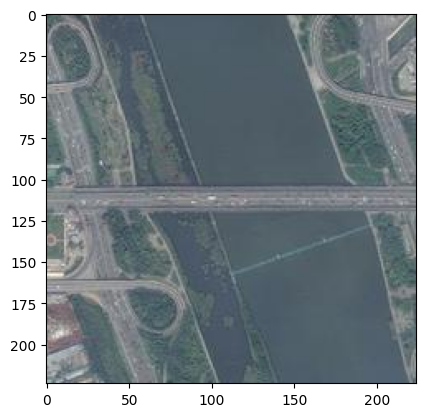

BLIP prediction: arafed aerial view of a bridge over a river and a city
VIT-GPT2 prediction: ['an aerial view of a city at night']
D:\Downloads\RSICD\\00008.jpg
(224, 224, 3)


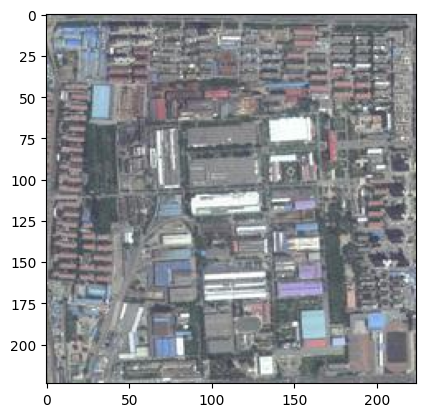

BLIP prediction: an aerial view of a city with a lot of buildings
VIT-GPT2 prediction: ['a city street filled with lots of traffic']
D:\Downloads\RSICD\\00009.jpg
(224, 224, 3)


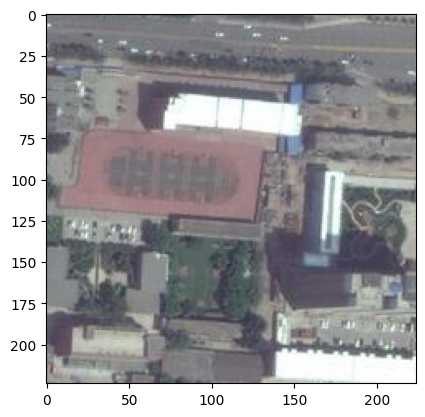

BLIP prediction: an aerial view of a large building with a red roof
VIT-GPT2 prediction: ['a large building with a clock on the side of it']
D:\Downloads\RSICD\\00010.jpg
(224, 224, 3)


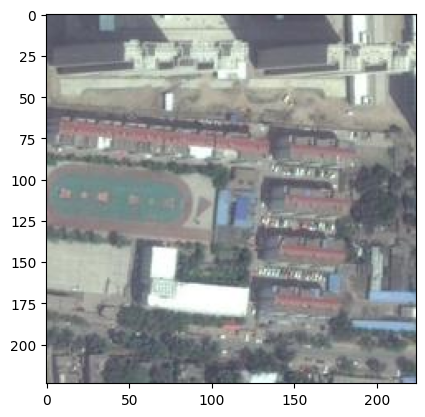

BLIP prediction: an aerial view of a baseball field and a baseball field
VIT-GPT2 prediction: ['a city street filled with lots of tall buildings']


In [13]:
extension = '.jpg'
for i in range(10):
    img_path = r'D:\Downloads\RSICD\\' + str(i+1).zfill(5) + extension
    print(img_path)
    raw_img = Image.open(img_path).convert('RGB')
    print(np.array(raw_img).shape)
    plt.imshow(raw_img)
    plt.show()
    
    prediction_blip = model_blip.predict(raw_img, log = True)
    prediction_vit = model_vit.predict(raw_img, log = True)
    prediction_git = model_git.predict(raw_img, log = True)

In [13]:
extension = '.jpg'
for i in range(10):
    img_path = './ILT_aerosensing_proeffoto\'s/' + str(i+1).zfill(5) + extension
    print(img_path)
    raw_img = Image.open(img_path).convert('RGB')
    print(np.array(raw_img).shape)
    plt.imshow(raw_img)
    plt.show()
    
    prediction_blip = model_blip.predict(raw_img, log = True)
    prediction_vit = model_vit.predict(raw_img, log = True)
    prediction_git = model_git.predict(raw_img, log = True)

./ILT_aerosensing_proeffoto's00001.jpg


FileNotFoundError: [Errno 2] No such file or directory: "./ILT_aerosensing_proeffoto's00001.jpg"

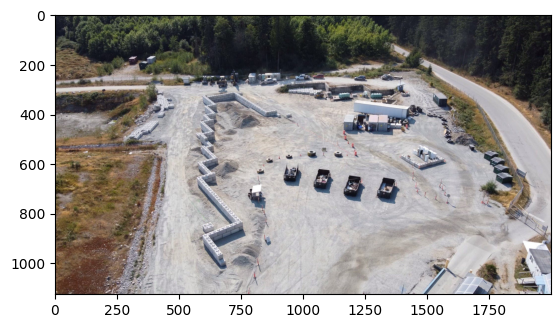

Predicting...
blip prediction(s): ['arafed view of a residential neighborhood with a street and a car']
Conditional image caption:
Predicting...
blip prediction(s): ['a photograph of a street with houses and a car driving down it']
Predicting...
vit prediction(s): ['a city street with houses and cars on it']


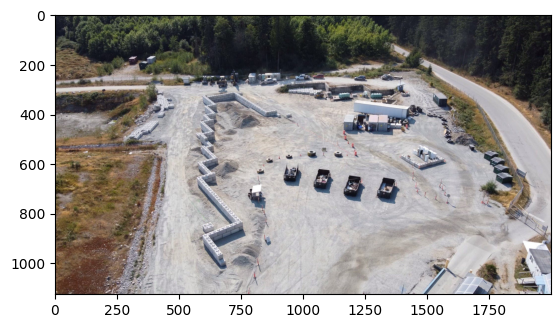

Predicting...
blip prediction(s): ['aerial view of a boat docked at a dock with a house on the shore']
Conditional image caption:
Predicting...
blip prediction(s): ['a photograph of a boat is docked at a dock near a house']
Predicting...
vit prediction(s): ['a bridge over a body of water']


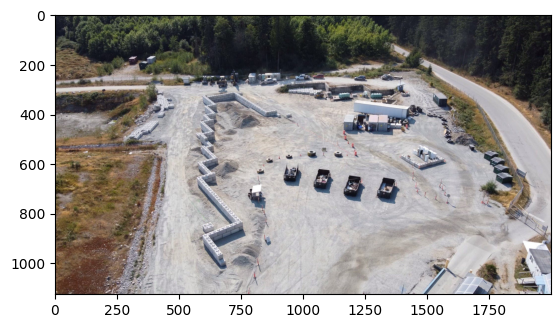

Predicting...
blip prediction(s): ['there is a large construction site with trucks and trucks parked in it']
Conditional image caption:
Predicting...
blip prediction(s): ['a photograph of a construction site with trucks and trucks parked in the lot']
Predicting...
vit prediction(s): ['trucks are parked in a parking lot']


In [17]:
img_urls = ['https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.pexels.com%2Fvideos%2F854222%2Ffree-video-854222.jpg%3Fauto%3Dcompress%26cs%3Dtinysrgb%26fit%3Dcrop%26h%3D627%26w%3D1200&f=1&nofb=1&ipt=854ab08c5b2d96e862c1babfd3aef50f054fe4debb1f1ac9f127e9b504866397&ipo=images'
, 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.ytimg.com%2Fvi%2F9zVtkRbeavU%2Fmaxresdefault.jpg&f=1&nofb=1&ipt=430544029f8fb5e6645566f08bb2d57cfe07e69e38bc14e07afaf941ba3fec35&ipo=images'
, 'https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fehq-production-canada.imgix.net%2F6af00617b784b7ea08195f15275998f8f335bcbc%2Foriginal%2F1626805948%2F39db379658a1fa22603921f4e5cd4b01_landfill_drone_photo.jpg%3Fauto%3Dcompress%26fit%3Dcrop&f=1&nofb=1&ipt=44de1092b4d4ff430e1d2e1c4ea11690117ca8c944786f9c6038e1a32c547def&ipo=images'
           ]
for img_url in img_urls:
    raw_img = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
    plt.imshow(raw_image)
    plt.show()
    
    prediction_blip = model_blip.predict(raw_img, log = True)
    print("Conditional image caption:")
    prediction_blip_text = model_blip.predict(raw_img, "a photograph of", log = True)
    prediction_vit = model_vit.predict(raw_img, log = True)    

In [7]:
predictions = [' '.join(["the", "picture", "the", "picture",
                "by", "me"])]

print(predictions)
references = [
    ' '.join(["the", "picture", "is", "clicked", "by", "me"]), 
     ' '.join(["this", "picture", "was", "clicked", "by", "me"])
]
print(references)
get_max_bleu(bleu, predictions, references, max_order = 2)

['the picture the picture by me']
['the picture is clicked by me', 'this picture was clicked by me']


([{'bleu': 0.5163977794943222,
   'precisions': [0.6666666666666666, 0.4],
   'brevity_penalty': 1.0,
   'length_ratio': 1.0,
   'translation_length': 6,
   'reference_length': 6},
  {'bleu': 0.316227766016838,
   'precisions': [0.5, 0.2],
   'brevity_penalty': 1.0,
   'length_ratio': 1.0,
   'translation_length': 6,
   'reference_length': 6}],
 0.5163977794943222)